# MovieLens Dataset

## MovieLens 100k

In this notebook you will work with the well known [MovieLens 100k](http://grouplens.org/datasets/movielens/) data set that has moving rating for 100,000 movies.

The `prefix` should be set to the directory where the `ml-100k` data set is. Don't forget to use backslashes on Windows!

In [207]:
prefix = '/data/movielens-100k/ml-100k/'

## Imports

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os

## Users

Use `pandas.read_csv` to read the `u.user` file as a Pandas `DataFrame` named `users`. See the tests below for the column names to use.

In [209]:
# YOUR CODE HERE
users = pd.read_csv(prefix + 'u.user', sep="|", header=None, index_col = 0)

Tidy the `users` table to get it to pass the tests below.

In [210]:
# YOUR CODE HERE
users.columns = ['age','gender','occupation','zip']
users.index.name = 'user_id'
users['gender'] = users['gender'].astype("category") 
users['occupation'] = users['occupation'].astype("category") 

In [211]:
users.head()

,age,gender,occupation,zip
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [212]:
assert len(users)==943
assert list(users.columns)==['age','gender','occupation','zip']
assert users.index.name=='user_id'
assert users.age.dtype.name=='int64'
assert users.gender.dtype.name=='category'
assert users.occupation.dtype.name=='category'

Make an appropriately labeled `countplot` with the `occupation` on the y-axis and the `gender` as the hue:

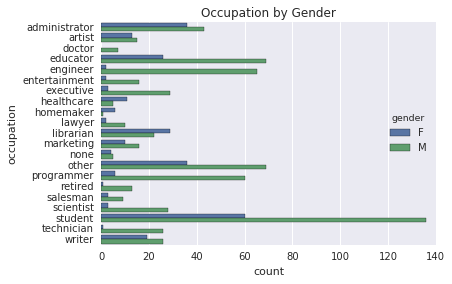

In [213]:
# YOUR CODE HERE
sns.countplot(y = "occupation", hue = "gender", data = users)
plt.title("Occupation by Gender")

Make an appropriately labeled `distplot` of the `age` column:

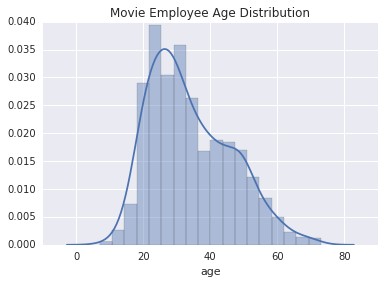

In [214]:
# YOUR CODE HERE
sns.distplot(users.age)
plt.title("Movie Employee Age Distribution")

## Genres

Use `pandas.read_csv` to read the `u.genre` file as a Pandas `DataFrame` named `genres`. See the tests below for the column names to use.

In [215]:
# YOUR CODE HERE
genres = pd.read_csv(prefix + 'u.genre', sep="|", header=None, index_col = 1)

Tidy the `genres` table to get it to pass the tests below.

In [216]:
# YOUR CODE HERE
genres.index.name = 'genre_id'
genres.columns = ['genre']
genres['genre'] = genres['genre'].astype('category')

In [217]:
genres.head()

,genre
genre_id,
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's


In [218]:
assert len(genres)==19
assert genres.index.name=='genre_id'
assert list(genres.columns)==['genre']
assert genres.genre.dtype.name=='category'

## Ratings

Use `pandas.read_csv` to read the `u.data` file as a Pandas `DataFrame` named `ratings`. See the tests below for the column names to use.

In [219]:
# YOUR CODE HERE
ratings = pd.read_csv(prefix + 'u.data', sep="\t", header=None)
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [220]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [221]:
assert len(ratings)==100000
assert ratings.user_id.dtype.name=='int64'
assert ratings.movie_id.dtype.name=='int64'
assert ratings.rating.dtype.name=='int64'
assert ratings.timestamp.dtype.name=='int64'

## Movies

Use `pandas.read_csv` to read the `u.item` file as a Pandas `DataFrame` named `movies`. See the tests below for the column names to use.

In [312]:
# YOUR CODE HERE
movies = pd.read_csv(prefix + 'u.item', sep="|", header=None, engine='python', index_col = 0)

In [313]:
movies.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In this form, the `movie_title` column has both the title and the year. Split these out into a `movie_title` column that only has the title and a `year` column. Also set the index to be the `movie_id`.

In [314]:
# YOUR CODE HERE
movies.index.name = "movie_id"
year_list = []
for i in movies[1].values:
    temp = i.split(")")
    if temp[-1] == " " or "(V)" in i or "unknown" in i:
        year_list.append("unknown")
    else:
        year_list.append(i.split()[-1].strip("()"))
movies['year'] = year_list
title_list = []
for j in movies[1].values:
    if temp[-1] == " " or "(V)" in j or "unknown" in j:
        title_list.append(j)
    else:
        title_list.append(" ".join(j.split()[:-1]))
movies[1] = title_list

In [315]:
movies.head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,year
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,GoldenEye,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,Four Rooms,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
4,Get Shorty,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
5,Copycat,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In the `year` column, replace `''` and `'V'` by `'unknown'`:

In [316]:
# YOUR CODE HERE
movies["movie_title"] = movies[1]

In [317]:
assert '' not in movies.year.unique()
assert 'V' not in movies.year.unique()
assert movies.year.value_counts()['unknown']==5
assert movies.movie_title.dtype.name=='object'
assert movies.year.dtype.name=='object'
assert movies.index.name=='movie_id'

## Merges and joins

Use the `merge` function to create a single `DataFrame`, named `m1`, that has user's information (age, gender, occupation, zip) and the movie titles of all the movies they rated along with the rating for each movie. Sort the resulting index.

In [318]:
# YOUR CODE HERE
m1 = pd.merge(pd.merge(users, ratings, left_index=True, right_on='user_id', how='right'),
              movies, left_on='movie_id', right_index=True, how='left')
m1 = m1[['age', 'gender', 'occupation', 'zip', 'rating', 'movie_title']]

In [319]:
m1.head()

,age,gender,occupation,zip,rating,movie_title
0,49,M,writer,55105,3,Kolya
1,39,F,executive,00000,3,L.A. Confidential
2,25,M,writer,40206,1,Heavyweights
3,28,M,technician,80525,2,Legends of the Fall
4,47,M,educator,55113,1,Jackie Brown


In [320]:
assert list(m1.columns)==['age', 'gender', 'occupation', 'zip', 'rating', 'movie_title']
assert len(m1)==100000

Use `pandas.concat` to add another column to the `movies` `DataFrame`, named `count` that contains the integer number of time each movie was rated.

In [322]:
# YOUR CODE HERE
movie_counts = m1.groupby('movie_title').size().to_frame('count')
movies = pd.merge(movies, movie_counts, left_on='movie_title', right_index=True, how='inner')
movies = movies[['movie_title', 'year', 'count']]

In [323]:
movies.head()

,movie_title,year,count
movie_id,,,
1,Toy Story,1995,452
2,GoldenEye,1995,131
3,Four Rooms,1995,90
4,Get Shorty,1995,209
5,Copycat,1995,86


In [324]:
assert list(movies.columns)==['movie_title', 'year', 'count']
assert movies.index.name=='movie_id'

Make an appropriately labeled Seaborn `barplot` that shows the `count` on the x-axis and `movie_title` on the y-axis. Only show the 20 movies with the most reviews, sorted by the number of reviews.

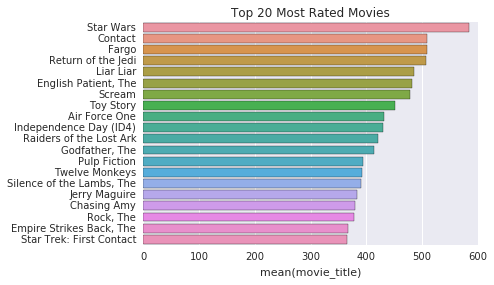

In [339]:
# YOUR CODE HERE
sns.barplot(m1['movie_title'].value_counts()[:20], m1['movie_title'].value_counts()[:20].index)
plt.title("Top 20 Most Rated Movies")

Use `pandas.concat` to add another column to the movies `DataFrame`, named `rating` that contains the average rating for that movie.

In [327]:
# YOUR CODE HERE
ratings = m1.groupby('movie_title')['rating'].agg({"rating": np.mean})

In [332]:
movies = pd.merge(movies, ratings, left_on='movie_title', right_index='True', how='inner')

In [333]:
movies.head()

,movie_title,year,count,rating
movie_id,,,,
1,Toy Story,1995,452,3.878319
2,GoldenEye,1995,131,3.206107
3,Four Rooms,1995,90,3.033333
4,Get Shorty,1995,209,3.550239
5,Copycat,1995,86,3.302326


In [334]:
assert list(movies.columns)==['movie_title','year','count','rating']

Make an appropriately labeled Seaborn `stripplot` with the mean rating on the x-axis and the `movie_title` on the y-axis. Order the movies by their mean rating and only show the top 30 movies. Only show a grid for the y-axis.

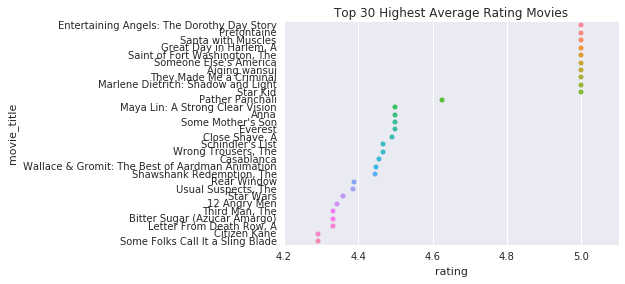

In [340]:
# YOUR CODE HERE
top30 = movies.loc[movies['rating'].sort_values(ascending=False).index[:30],'movie_title'].values
sns.stripplot(x = "rating", y = "movie_title", data = movies, order = top30)
plt.title("Top 30 Highest Average Rating Movies")

Explore the relationship between the number of reviews for a movie and its mean rating using a Seaborn `jointplot`:

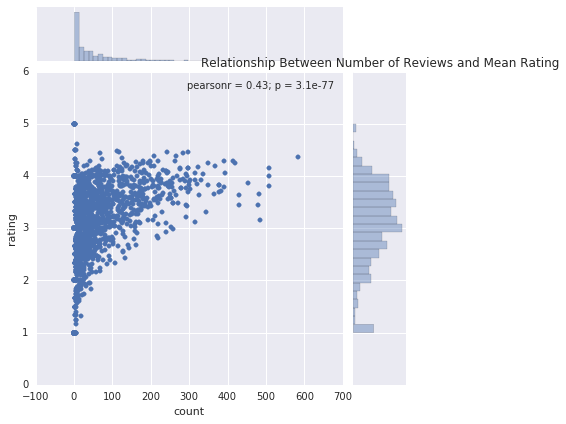

In [341]:
# YOUR CODE HERE
sns.jointplot(x = "count", y = "rating", data = movies)
plt.title("Relationship Between Number of Reviews and Mean Rating")

Compute the mean rating grouped by the year and use Seaborn's `regplot` to perform a bootstrapped linear regression of the `rating` against the `year` (you will have to read the documentation for `regplot` carefully). The idea here is to explore how the average rating evolves over time.

In [352]:
movies = movies[movies['year'] != 'unknown']

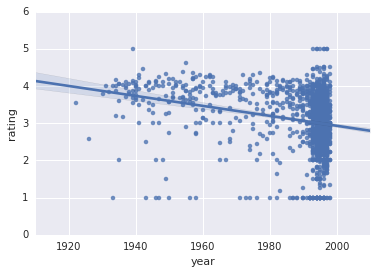

In [354]:
# YOUR CODE HERE
sns.regplot(x = movies['year'].astype('int') , y = movies['rating'])